<a href="https://colab.research.google.com/github/shubhamksingh1/TextClassification/blob/main/French/BertTextClassification_French_Movie_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Simple Transformers library 

In [ ]:
# install simpletransformers
!pip install simpletransformers

Loading Dataset

In [ ]:
pip install nlp

     |████████████████████████████████| 1.7MB 11.1MB/s 
     |████████████████████████████████| 17.2MB 196kB/s 
     |████████████████████████████████| 245kB 54.0MB/s 
  Found existing installation: pyarrow 0.14.1
    Uninstalling pyarrow-0.14.1:
      Successfully uninstalled pyarrow-0.14.1


In [ ]:
import nlp

train_ds, val_ds, test_ds = nlp.load_dataset(
    'allocine', 
    split=['train', 'validation', 'test']
)

Dataset allocine_dataset downloaded and prepared to /root/.cache/huggingface/datasets/allocine_dataset/allocine/1.0.0/db8120b87276d60a04c8f5f734698ecc094b107e23b60a449e31639f24867cc9. Subsequent calls will reuse this data.


In [ ]:
type(train_ds)

nlp.arrow_dataset.Dataset

### Dataset to Dataframe

In [ ]:
import pandas as pd


In [ ]:
train_df=pd.DataFrame()
val_df=pd.DataFrame()
test_df=pd.DataFrame()

In [ ]:
train_df = pd.DataFrame(data=train_ds)
val_df = pd.DataFrame(data=val_ds)
test_df = pd.DataFrame(data=test_ds)

### Reording columns as needed by model

In [ ]:
train_df = train_df[['review','label']]
val_df = val_df[['review','label']]
test_df = test_df[['review','label']]

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(160000, 2)
(20000, 2)
(20000, 2)


In [ ]:
print("train_info:\n")
print(train_df.info())
print("val_info:\n")
print(val_df.info())
print("test_info:\n")
print(test_df.info())

train_info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   review  160000 non-null  object
 1   label   160000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB
None
val_info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  20000 non-null  object
 1   label   20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
None
test_info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  20000 non-null  object
 1   label   20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
None


In [ ]:
print(train_df.isna().sum())
print(val_df.isna().sum())
print(test_df.isna().sum())

review    0
label     0
dtype: int64
review    0
label     0
dtype: int64
review    0
label     0
dtype: int64


In [ ]:
train_df.head()

,review,label
0,Si vous cherchez du cinéma abrutissant à tous ...,0
1,"Trash, re-trash et re-re-trash...! Une horreur...",0
2,"Et si, dans les 5 premières minutes du film, l...",0
3,Mon dieu ! Quelle métaphore filée ! Je suis ab...,0
4,"Premier film de la saga Kozure Okami, ""Le Sabr...",1


In [ ]:
train_df.tail()

,review,label
159995,Un rythme bien trop lent et un Ashton Kutcher ...,0
159996,Monsieur Duchovny vous êtes aussi piètre acteu...,0
159997,Complètement différent des films de la série C...,1
159998,Alors franchement pour le moment c'est le meil...,1
159999,Beur sur la ville réunit à lui même toutes les...,0


In [ ]:
val_df.head()

,review,label
0,Ce film est tout ce qu'il y a de plus sympa. M...,0
1,"The Wall a été réalisé par Alan Parker (Fame, ...",1
2,"Encore un film majeur tres mal distribué, comm...",1
3,L'idée est très bonne mais le film manque de r...,0
4,Un petit nanar rigolo a regarder. A voir une f...,0


In [ ]:
val_df.tail()

,review,label
19995,Ce petit film tourné en 18 jours pour la somme...,1
19996,"Le roman de Forsyth, d'où est tiré le scénario...",0
19997,"Qu'on aime ou pas ""Toni Erdmann"" - et au sorti...",1
19998,"Un film qui a fait un certain buzz médiatique,...",1
19999,"C'est long, c'est mièvre, c'est ennuyeux tout ...",0


In [ ]:
test_df.head()

,review,label
0,"Magnifique épopée, une belle histoire, touchan...",1
1,Je n'ai pas aimé mais pourtant je lui mets 2 é...,0
2,Un dessin animé qui brille par sa féerie et se...,1
3,"Si c'est là le renouveau du cinéma français, c...",0
4,Et pourtant on s’en Doutait !Second volet très...,0


In [ ]:
test_df.tail()

,review,label
19995,"je suis éventreur, arracheur, tailladeur, goug...",1
19996,Trémors 3 essouffle la série des trémors par u...,0
19997,"0/20 : Tout d’abord, la mise en scène est tout...",0
19998,Un scénario très original mené par des personn...,1
19999,Ce dernier volet de la trilogie a beau être le...,1


### Visualisation

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
fig = px.histogram(train_df, x="label",color="label")
fig.update_layout(
    title_text='Sentiment of movie reviews', # title of plot
    xaxis_title_text='Sentiment', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, 
    bargroupgap=0.1
)
fig.show()

In [ ]:
fig = px.histogram(test_df, x="label",color="label")
fig.update_layout(
    title_text='Sentiment of movie reviews', # title of plot
    xaxis_title_text='Sentiment', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, 
    bargroupgap=0.1
)
fig.show()

In [ ]:
fig = px.histogram(val_df, x="label",color="label")
fig.update_layout(
    title_text='Sentiment of movie reviews', # title of plot
    xaxis_title_text='Sentiment', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, 
    bargroupgap=0.1
)
fig.show()

### Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import *
from tabulate import tabulate

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
def univariate_categorical(df,x):
       
    print('\nNumber of unique values => ' + str(len(df[x].unique())) + '\n\n')

    plt.figure(figsize=(10, 10))
    
    y = "count"
    plt.subplot(2, 1, 1)
    plt.xticks(rotation=90)

    sns.countplot(df[x])
    count_df = df[x].value_counts().rename(y).reset_index().rename(columns={"index":x})
    y = "percent(%)"
    percent_df = df[x].value_counts(normalize=True).rename(y).reset_index().rename(columns={"index":x})
    plt.subplot(2, 1, 2)
    sns.barplot(percent_df[x], percent_df[y], data=percent_df)
    plt.xticks(rotation=90)
    plt.show()
    print(tabulate(pd.merge(percent_df, count_df, how='inner'), headers='keys', tablefmt='fancy_grid'))



0. Negative Review
1. Positive Review




Number of unique values => 2




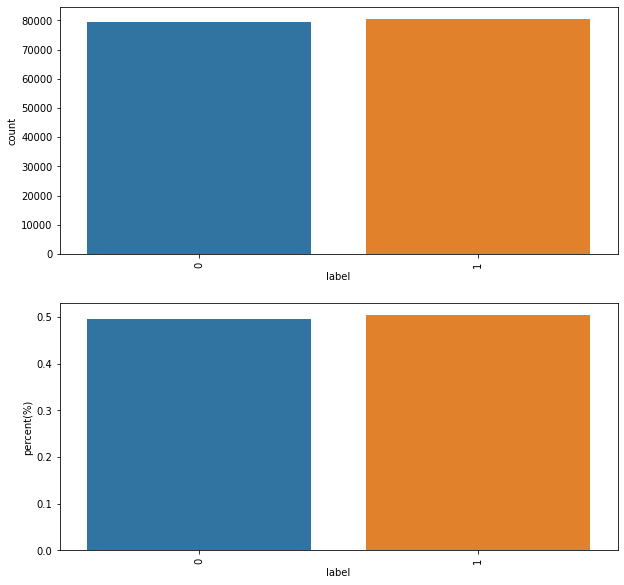

╒════╤═════════╤══════════════╤═════════╕
│    │   label │   percent(%) │   count │
╞════╪═════════╪══════════════╪═════════╡
│  0 │       1 │     0.503669 │   80587 │
├────┼─────────┼──────────────┼─────────┤
│  1 │       0 │     0.496331 │   79413 │
╘════╧═════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(train_df,"label")


Number of unique values => 2




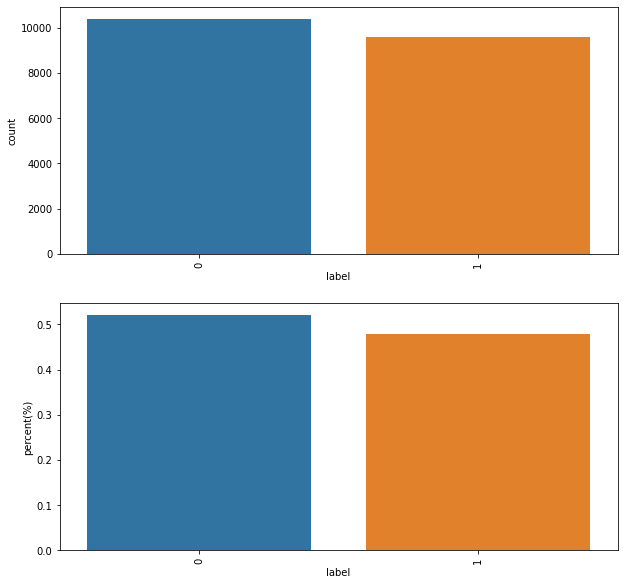

╒════╤═════════╤══════════════╤═════════╕
│    │   label │   percent(%) │   count │
╞════╪═════════╪══════════════╪═════════╡
│  0 │       0 │       0.5204 │   10408 │
├────┼─────────┼──────────────┼─────────┤
│  1 │       1 │       0.4796 │    9592 │
╘════╧═════════╧══════════════╧═════════╛


In [ ]:

univariate_categorical(test_df,"label")


Number of unique values => 2




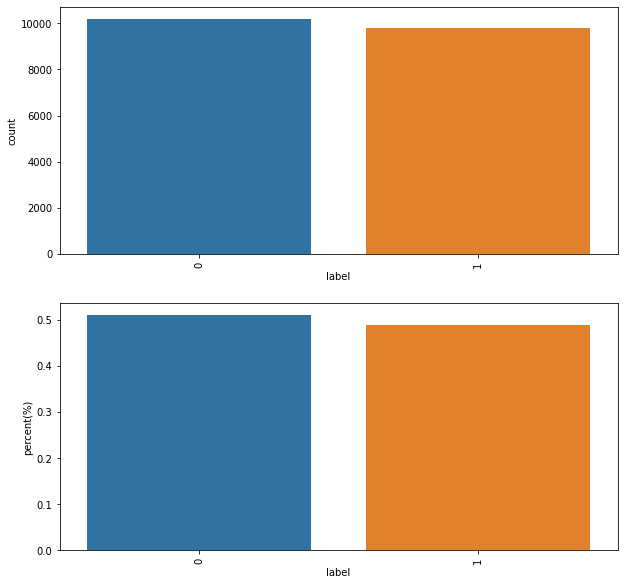

╒════╤═════════╤══════════════╤═════════╕
│    │   label │   percent(%) │   count │
╞════╪═════════╪══════════════╪═════════╡
│  0 │       0 │       0.5102 │   10204 │
├────┼─────────┼──────────────┼─────────┤
│  1 │       1 │       0.4898 │    9796 │
╘════╧═════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(val_df,"label")

In [ ]:
train_df.to_csv("/content/drive/My Drive/FrenchReviewClassification/train_df.csv",index=False)
test_df.to_csv("/content/drive/My Drive/FrenchReviewClassification/test_df.csv",index=False)
val_df.to_csv("/content/drive/My Drive/FrenchReviewClassification/val_df.csv",index=False)

### Creating Subset Of Dataframe to reduce training time

In [ ]:
train_df4KPositive = train_df[train_df['label'] == 1] 

In [ ]:
train_df4KPositive.shape

(80587, 2)

In [ ]:
train_df4KPositive = train_df4KPositive.sample(n=4000,random_state=0)

In [ ]:
train_df4KPositive.shape

(4000, 2)

In [ ]:
train_df4KPositive.head()

,review,label
119492,Cet ultime film d'Alain Resnais continue l'hom...,1
4218,"En général, je suis assez allergique aux films...",1
88189,"Un film très sympathique, une succession de ga...",1
59350,wow its a movie really good very beautiful imp...,1
93205,"Normal que certains n'apprécient pas,ils ne co...",1


In [ ]:
train_df4KNegative = train_df[train_df['label'] == 0] 

In [ ]:
train_df4KNegative = train_df4KNegative.sample(n=4000,random_state=0)

In [ ]:
train_df4KNegative.shape

(4000, 2)

In [ ]:
train_df4KNegative.head()

,review,label
22656,Ayant vu « Battement de cœur » d'Henri Decoin ...,0
125638,Seconde réalisation de Patrick Timsit. Quelqu'...,0
8888,faire le portrait d'un paumé c'est courageux m...,0
14020,Avant-dernier long-métrage achevé d'Orson Well...,0
51644,Franchement ce n'est pas un film. simplement u...,0


In [ ]:
traindf_subset = train_df4KPositive.append(train_df4KNegative, ignore_index=True)

In [ ]:
from sklearn.utils import shuffle

In [ ]:

traindf_subset = shuffle(traindf_subset,random_state=0)

In [ ]:
traindf_subset.reset_index(drop=True,inplace=True)

In [ ]:
traindf_subset.shape

(8000, 2)

In [ ]:
traindf_subset.head()

,review,label
0,"le film est une réussite technique , un plan s...",1
1,"Comme c’est un beau film,bien fait,sérieux et ...",1
2,Cette comédie italienne où Marcello Mastroiann...,0
3,"Les portes du ciel sont ouvertes, paraît-il, m...",1
4,Jadore Vraiment !! Histoire Cool Avek Amitié A...,1


In [ ]:
traindf_subset.tail()

,review,label
7995,"De fanfaronnades en cabotinage, Billy Crystal ...",0
7996,"Très bonne surprise, je ne m'attendais à rien ...",1
7997,Robert Zemeckis fait parti des réalisateurs qu...,1
7998,"Aux Etats-Unis, alors que le maccarthysme sèvi...",1
7999,C'est tellement rare de voir de nos jours un G...,1


In [ ]:
valdf_4KPositive = val_df[val_df['label'] == 1] 
valdf_4KPositive = valdf_4KPositive.sample(n=3000,random_state=0)

In [ ]:
valdf_4KNegative = val_df[val_df['label'] == 0] 
valdf_4KNegative = valdf_4KNegative.sample(n=3000,random_state=0)

In [ ]:
valdf_subset = valdf_4KPositive.append(valdf_4KNegative, ignore_index=True)

In [ ]:
valdf_subset = shuffle(valdf_subset,random_state=0)

In [ ]:
valdf_subset.reset_index(drop=True,inplace=True)

In [ ]:
valdf_subset.shape

(6000, 2)

In [ ]:
valdf_subset.head()

,review,label
0,Les cinq premières minutes sur l'histoire de F...,0
1,"L'apparition d'un intrus, ""The intruder"", d'un...",1
2,Voilà une comédie française qui avait échappé ...,0
3,"Après toutes ces années, je me suis finalement...",1
4,"""Maniac"" cest une sorte de thriller filmé a tr...",1


In [ ]:
valdf_subset.tail()

,review,label
5995,long ennuyeux sans interêt j'ai failli m'endor...,0
5996,L'idée de diffuser l'esprit de la tektonik au ...,0
5997,Comme l’a justement souligné l’internaute Clas...,1
5998,"A mi-chemin du fantastique et de la réalité, u...",1
5999,Ce film est sans doute un des plus grands succ...,1


In [ ]:
testdf_4KPositive = test_df[test_df['label'] == 1] 
testdf_4KPositive = testdf_4KPositive.sample(n=2500,random_state=0)
testdf_4KNegative = test_df[test_df['label'] == 0] 
testdf_4KNegative = testdf_4KNegative.sample(n=2500,random_state=0)

In [ ]:
testdf_subset = testdf_4KPositive.append(testdf_4KNegative, ignore_index=True)

In [ ]:
testdf_subset = shuffle(testdf_subset,random_state=0)

In [ ]:
testdf_subset.reset_index(drop=True,inplace=True)

In [ ]:
testdf_subset.shape

(5000, 2)

In [ ]:
testdf_subset.head()

,review,label
0,Une belle peinture du monde rural sous l'occup...,1
1,"Tout petit western, ce film de George Sherman ...",0
2,Quel ennui ! Peu d'émotions vraies. Des dialog...,0
3,"Ce n'est pas un navet, mais presque. Par contr...",0
4,"Certes, on pourra toujours regretter quelques ...",1


In [ ]:
testdf_subset.tail()

,review,label
4995,Pas de quoi s'extasier devant le dernier Johnn...,0
4996,"Beau casting, quelques scènes sympa, un Jason ...",0
4997,Cela faisait longtemps que je n'avais pas été ...,1
4998,"Nul et décevant, je m'attendais à un bon film ...",0
4999,"Réalisé en 1940 par Henry C.Potter, "" Swing Ro...",0



Number of unique values => 2




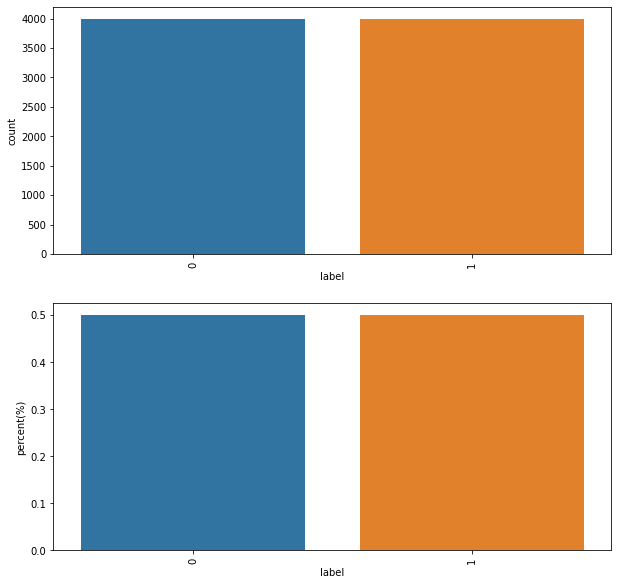

╒════╤═════════╤══════════════╤═════════╕
│    │   label │   percent(%) │   count │
╞════╪═════════╪══════════════╪═════════╡
│  0 │       1 │          0.5 │    4000 │
├────┼─────────┼──────────────┼─────────┤
│  1 │       0 │          0.5 │    4000 │
╘════╧═════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(traindf_subset,'label')


Number of unique values => 2




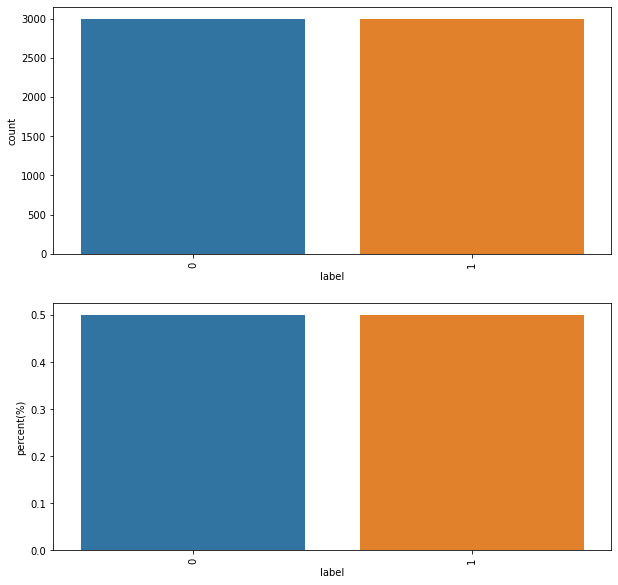

╒════╤═════════╤══════════════╤═════════╕
│    │   label │   percent(%) │   count │
╞════╪═════════╪══════════════╪═════════╡
│  0 │       1 │          0.5 │    3000 │
├────┼─────────┼──────────────┼─────────┤
│  1 │       0 │          0.5 │    3000 │
╘════╧═════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(valdf_subset,'label')


Number of unique values => 2




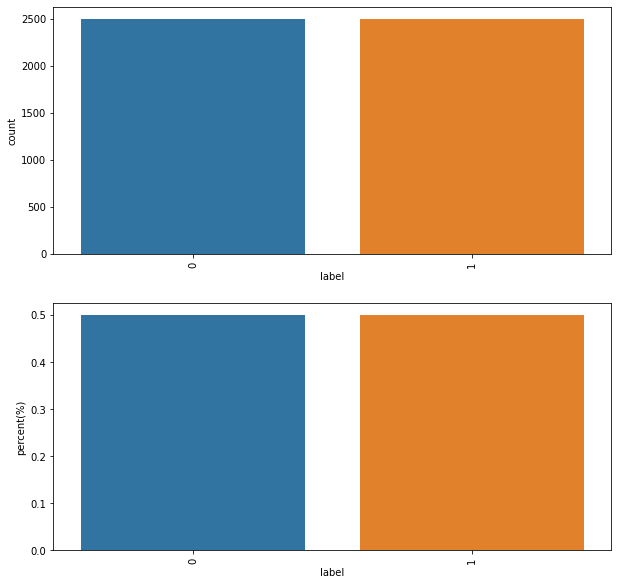

╒════╤═════════╤══════════════╤═════════╕
│    │   label │   percent(%) │   count │
╞════╪═════════╪══════════════╪═════════╡
│  0 │       1 │          0.5 │    2500 │
├────┼─────────┼──────────────┼─────────┤
│  1 │       0 │          0.5 │    2500 │
╘════╧═════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(testdf_subset,'label')

### Saving these subsets of Dataframe

In [ ]:
traindf_subset.to_csv("/content/drive/My Drive/FrenchReviewClassification/traindf_subset.csv",index=False)
testdf_subset.to_csv("/content/drive/My Drive/FrenchReviewClassification/testdf_subset.csv",index=False)
valdf_subset.to_csv("/content/drive/My Drive/FrenchReviewClassification/valdf_subset.csv",index=False)

### Load Pretrained French Model

In [ ]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "evaluate_during_training": True,
             "evaluate_during_training_verbose": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "dbmdz/bert-base-french-europeana-cased",
    num_labels=2,
    args=train_args
)

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Some weights of the model checkpoint at dbmdz/bert-base-french-europeana-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassificat

### Train Model

In [ ]:
def count_matches(labels, preds):
    print(labels)
    print(preds)
    print(sum([1 if label == pred else 0 for label, pred in zip(labels, preds)]))
    return sum([1 if label == pred else 0 for label, pred in zip(labels, preds)])

In [ ]:
# Train the model
model.train_model(traindf_subset,eval_df=valdf_subset,matches=count_matches)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:282: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning:

To get the last learning rate computed by the scheduler, please use `get_last_lr()`.



/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning:

Please also save or load the state of the optimzer when saving or loading the scheduler.

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:754: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



[0 1 0 ... 1 1 1]
[0 0 0 ... 0 1 1]
5230


[0 1 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
5442

[0 1 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
5442



[0 1 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
5456


[0 1 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
5476

[0 1 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
5476



In [ ]:
# Evaluate the model

In [ ]:
print(model.eval_model(valdf_subset, matches=count_matches))

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:754: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.




[0 1 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
5476
({'mcc': 0.8253692835339487, 'tp': 2724, 'tn': 2752, 'fp': 248, 'fn': 276, 'matches': 5476, 'eval_loss': 0.5304891255786837}, array([[ 3.6713946, -3.9896946],
       [ 2.5720968, -2.8889687],
       [ 4.307574 , -4.5715117],
       ...,
       [-3.2821326,  4.068724 ],
       [-3.852329 ,  4.529292 ],
       [-3.740127 ,  4.4600143]], dtype=float32), [<simpletransformers.classification.classification_utils.InputExample object at 0x7fd9aee732e8>, <simpletransformers.classification.classification_utils.InputExample object at 0x7fd9aee73208>, <simpletransformers.classification.classification_utils.InputExample object at 0x7fd9aee734a8>, <simpletransformers.classification.classification_utils.InputExample object at 0x7fd9aee73710>, <simpletransformers.classification.classification_utils.InputExample object at 0x7fd9aee737f0>, <simpletransformers.classification.classification_utils.InputExample object at 0x7fd9aee73ac8>, <simpletransformers.classifi

In [ ]:
print(model.eval_model(testdf_subset, matches=count_matches))

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:754: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.




[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]
4543
({'mcc': 0.8172895144497023, 'tp': 2253, 'tn': 2290, 'fp': 210, 'fn': 247, 'matches': 4543, 'eval_loss': 0.549361102223536}, array([[-3.6129758,  4.3116026],
       [ 4.3327017, -4.645537 ],
       [ 4.366065 , -4.6883693],
       ...,
       [-3.8390281,  4.4268665],
       [ 4.2581925, -4.638357 ],
       [ 3.5738745, -3.841042 ]], dtype=float32), [<simpletransformers.classification.classification_utils.InputExample object at 0x7fd9aebc5400>, <simpletransformers.classification.classification_utils.InputExample object at 0x7fd9aebc5550>, <simpletransformers.classification.classification_utils.InputExample object at 0x7fd9aebc59b0>, <simpletransformers.classification.classification_utils.InputExample object at 0x7fd9aebc5a20>, <simpletransformers.classification.classification_utils.InputExample object at 0x7fd9aebc5e48>, <simpletransformers.classification.classification_utils.InputExample object at 0x7fd9aea8d048>, <simpletransformers.classific

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(testdf_subset, f1=f1_multiclass, acc=accuracy_score,matches=count_matches)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:754: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.




[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]
4543


In [ ]:
result

{'acc': 0.9086,
 'eval_loss': 0.549361102223536,
 'f1': 0.9086,
 'fn': 247,
 'fp': 210,
 'matches': 4543,
 'mcc': 0.8172895144497023,
 'tn': 2290,
 'tp': 2253}

In [ ]:
model_outputs

array([[-3.6129758,  4.3116026],
       [ 4.3327017, -4.645537 ],
       [ 4.366065 , -4.6883693],
       ...,
       [-3.8390281,  4.4268665],
       [ 4.2581925, -4.638357 ],
       [ 3.5738745, -3.841042 ]], dtype=float32)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(valdf_subset, f1=f1_multiclass, acc=accuracy_score,matches=count_matches)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:754: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.




[0 1 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
5476


In [ ]:
result

{'acc': 0.9126666666666666,
 'eval_loss': 0.5304891255786837,
 'f1': 0.9126666666666666,
 'fn': 276,
 'fp': 248,
 'matches': 5476,
 'mcc': 0.8253692835339487,
 'tn': 2752,
 'tp': 2724}

# save and load the model

save files without outputs/ 


In [ ]:
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','frencheval-bert-french')

In [ ]:
!tar -zxvf ./frencheval-bert-french.tar.gz

outputs/vocab.txt
outputs/pytorch_model.bin
outputs/special_tokens_map.json
outputs/tokenizer_config.json
outputs/config.json
outputs/eval_results.txt
outputs/training_args.bin
outputs/model_args.json
outputs/training_progress_scores.csv


In [ ]:
!rm -rf outputs

In [ ]:
!cp -r "/content/frencheval-bert-french.tar.gz" "/content/drive/My Drive/FrenchReviewClassification/"

# Test the loaded model on a real example

In [ ]:
import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()


In [ ]:

unpack_model('/content/drive/My Drive/FrenchReviewClassification/frencheval-bert-french')

In [ ]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "evaluate_during_training": True,
             "evaluate_during_training_verbose": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "outputs/",
    num_labels=2,
    args=train_args
)

In [ ]:
class_list = ['Negative','Positive']
"""
Movie is below expectation

"""
test_tweet ="Le film est en dessous des attentes"
predictions, raw_outputs = model.predict([test_tweet])

print(class_list[predictions[0]])


Negative


In [ ]:
"""
Excellent Story each and every actor has played his part very beautifully.

"""
test_tweet = "Excellente histoire, chaque acteur a très bien joué son rôle."

predictions, raw_outputs = model.predict([test_tweet])

print(class_list[predictions[0]])


Positive
